In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("climate_nasa.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [3]:
# Check for nulls
df.isnull().sum()

# Drop rows with all nulls
df.dropna(how='all', inplace=True)

# Fill remaining missing values or drop
df.fillna(method='ffill', inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2784\3900547576.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_2784\1334049805.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['commentsCount'].sum().plot()


Text(0.5, 1.0, 'Monthly Comments Count')

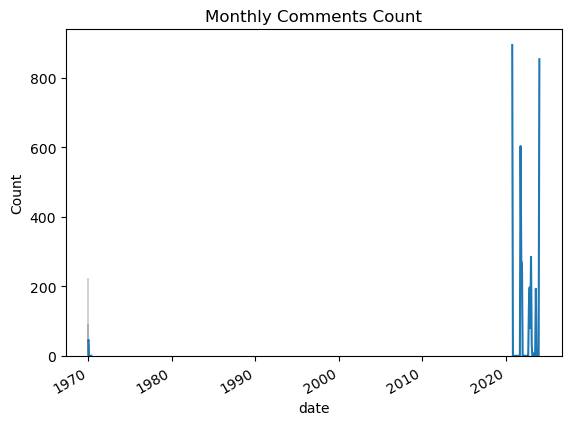

In [4]:
# Distribution of Likes
sns.histplot(df['likesCount'], kde=True)
plt.title("Likes Distribution")

# Comments over Time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date').resample('M')['commentsCount'].sum().plot()
plt.title("Monthly Comments Count")

Text(0.5, 1.0, 'Sentiment Score Distribution')

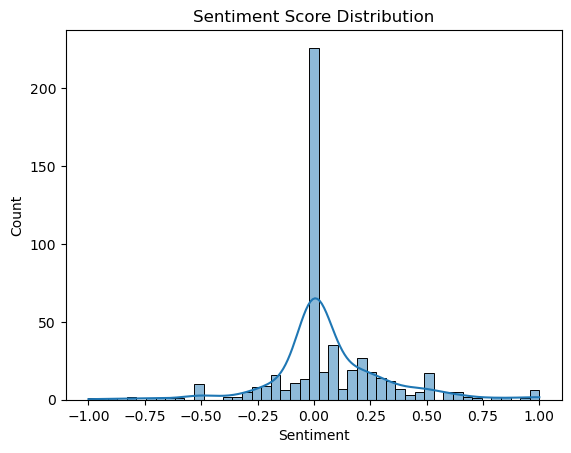

In [5]:
from textblob import TextBlob

df['Sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.histplot(df['Sentiment'], kde=True)
plt.title("Sentiment Score Distribution")

In [6]:
# Select features
X = df[['likesCount']]  # Add more numeric features if applicable
y = df['commentsCount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
df = df.dropna(subset=['commentsCount'])

In [9]:
X = df[['likesCount']]  # Add more features if needed
y = df['commentsCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Select features and target
df_model = df[['likesCount', 'commentsCount']].dropna()

X = df_model[['likesCount']]
y = df_model['commentsCount']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

MAE: 7.512526253036155
MSE: 204.76457989335177
R2 Score: -0.3262585228353443


Text(0.5, 1.0, 'Actual vs Predicted Comments Count')

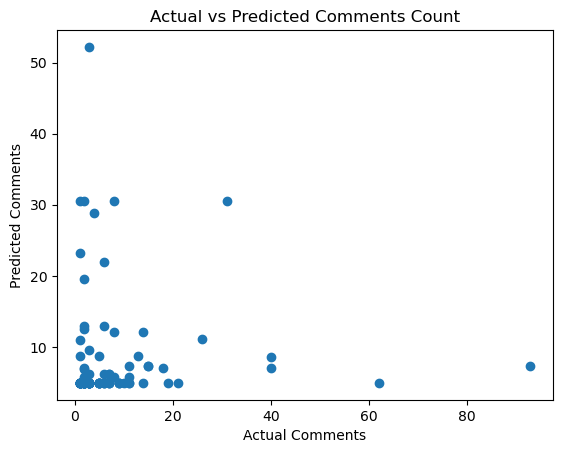

In [15]:
y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plotting actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Comments")
plt.ylabel("Predicted Comments")
plt.title("Actual vs Predicted Comments Count")

In [16]:
future = pd.DataFrame({'likesCount': [10, 100, 500]})
future_scaled = scaler.transform(future)
predictions = model.predict(future_scaled)
print(predictions)

[12.99066667 52.2        31.9       ]


In [17]:
df.to_csv("Climate_nasa.csv", index=False)